In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directors_full = pd.read_pickle('../data/pickles/director_writer_nodrop.p')
movies = pickle.load(open('../data/pickles/movies.p', 'rb'))
characters = pickle.load(open('../data/pickles/characters.p', 'rb'))
characters_movies = pd.merge(characters[['movie_wiki_id', 'actor_name', 'combined_birth', 'combined_gender']], movies[['wikipedia_id', 'title', 'combined_release_year', 'combined_runtime', 'combined_box_office', 'averageRating_imdb', 'numVotes_imdb']], left_on='movie_wiki_id', right_on='wikipedia_id', how='left')

In [3]:
df = movies[['title', 'averageRating_imdb', 'numVotes_imdb', 'combined_box_office']].copy()

df['numVotes_imdb'] = np.log(df.numVotes_imdb)
df['combined_box_office'] = np.log(df.combined_box_office)

df['numVotes_imdb'] =(df.numVotes_imdb - df.numVotes_imdb.mean()) / df.numVotes_imdb.std()
df['combined_box_office'] =(df.combined_box_office - df.combined_box_office.mean()) / df.combined_box_office.std()
df['averageRating_imdb'] =(df.averageRating_imdb - df.averageRating_imdb.mean()) / df.averageRating_imdb.std()

In [4]:
df['metric'] = df.numVotes_imdb * np.abs(df.averageRating_imdb)

In [1]:
temp = pd.merge(characters_movies[["actor_name","combined_gender","combined_birth","combined_release_year","title"]].dropna().drop_duplicates(), df[["metric","title"]].drop_duplicates(subset=["title"]), left_on="title", right_on="title", validate="many_to_one")
temp["age"] = temp["combined_release_year"]-temp["combined_birth"]
temp.head()

NameError: name 'pd' is not defined

Average metric for all actors:

In [6]:
temp.groupby("actor_name").mean("metric").sort_values(by = "metric", ascending = True).dropna().head(20)["metric"]

actor_name
Lawford Davidson                   -7.920586
Marguerite Marsh                   -6.691743
Agnes Gavin                        -5.446875
Sien De la Mar-Kloppers            -5.155973
Nelly De Heer                      -5.155973
Catharina Kinsbergen-Rentmeester   -5.155973
Frøydis Armand                     -4.761804
Bjarne Andersen                    -4.684138
Susi Lanner                        -4.627473
Harry Piel                         -4.627473
Josh Berresford                    -4.547863
Scott McKee                        -4.535918
Lillian Gale                       -4.535918
Leon De La Mothe                   -4.535918
Michael E. Arth                    -4.462769
Gerd Vespermann                    -4.452379
Elisabeth Neumann-Viertel          -4.452379
Shruthi Raj                        -4.447206
John George                        -4.420569
Ada Cornaro                        -4.397053
Name: metric, dtype: float64

find the percentage of male actor in each movie \\
take the date of each movie \\
take the gender of the director \\


In [234]:
pd.DataFrame(characters_movies.groupby("title")["combined_gender"].value_counts(normalize=True)).rename(columns={"combined_gender":"percent"})

percent
title               combined_gender          
#1 Cheerleader Camp female           0.666667
                    male             0.333333
$                   male             0.750000
                    female           0.250000
$9.99               male             0.888889
...                                       ...
…All the Marbles    female           0.600000
                    male             0.400000
₤500 Reward         female           1.000000
春田花花同學會             male             0.800000
                    female           0.200000

[103311 rows x 1 columns]

### Find film female actor percentage

In [237]:
new = pd.DataFrame(characters_movies.groupby("title")["combined_gender"].value_counts(normalize=True)).rename(columns={"combined_gender":"percent"})
new = new.reset_index()
newF = new.loc[new["combined_gender"] == "female"].drop(columns=["combined_gender"]).rename(columns={"percent":"f_actor_percentage"})
newM = new.loc[new["combined_gender"] == "male"].drop(columns=["combined_gender"]).rename(columns={"percent":"m_actor_percentage"})
actor_gender_percentage = pd.merge(newF, newM, left_on="title", right_on="title")
actor_gender_percentage

,title,f_actor_percentage,m_actor_percentage
0,#1 Cheerleader Camp,0.666667,0.333333
1,$,0.250000,0.750000
2,$9.99,0.111111,0.888889
3,'77,0.200000,0.800000
4,'Neath the Arizona Skies,0.428571,0.571429
...,...,...,...
44131,Ōte,0.500000,0.500000
44132,Želary,0.375000,0.625000
44133,Život sa stricem,0.333333,0.666667
44134,…All the Marbles,0.600000,0.400000


### Find actor mean age per film

In [239]:
age = temp.groupby(["title","combined_gender"]).agg("mean")
age = age.drop(columns=["combined_birth","combined_release_year","metric"])
age = age.reset_index()
ageF = age.loc[age["combined_gender"] == "female"].drop(columns=["combined_gender"]).rename(columns={"age":"f_actor_mean_age"})
ageM = age.loc[age["combined_gender"] == "male"].drop(columns=["combined_gender"]).rename(columns={"age":"m_actor_mean_age"})
actor_mean_age = pd.merge(ageF, ageM, left_on="title", right_on="title")
actor_mean_age

C:\Users\eliot\AppData\Local\Temp\ipykernel_16364\4079707898.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age = temp.groupby(["title","combined_gender"]).agg("mean")


,title,f_actor_mean_age,m_actor_mean_age
0,#1 Cheerleader Camp,43.500000,31.000000
1,$,32.500000,44.666667
2,$9.99,36.000000,38.750000
3,'77,54.000000,40.250000
4,'Neath the Arizona Skies,5.333333,37.000000
...,...,...,...
41590,Ōte,28.000000,28.000000
41591,Želary,50.000000,47.200000
41592,Život sa stricem,26.500000,37.750000
41593,…All the Marbles,29.333333,47.500000


In [241]:
gender_stats = pd.merge(actor_gender_percentage, actor_mean_age, left_on="title", right_on="title")
gender_stats = pd.merge(df[["title","metric"]], gender_stats, left_on="title", right_on="title", how="inner")

,title,f_actor_percentage,m_actor_percentage,f_actor_mean_age,m_actor_mean_age
0,#1 Cheerleader Camp,0.666667,0.333333,43.500000,31.000000
1,$,0.250000,0.750000,32.500000,44.666667
2,$9.99,0.111111,0.888889,36.000000,38.750000
3,'77,0.200000,0.800000,54.000000,40.250000
4,'Neath the Arizona Skies,0.428571,0.571429,5.333333,37.000000
...,...,...,...,...,...
41590,Ōte,0.500000,0.500000,28.000000,28.000000
41591,Želary,0.375000,0.625000,50.000000,47.200000
41592,Život sa stricem,0.333333,0.666667,26.500000,37.750000
41593,…All the Marbles,0.600000,0.400000,29.333333,47.500000


In [253]:
gender_stats

,title,metric,f_actor_percentage,m_actor_percentage,f_actor_mean_age,m_actor_mean_age
0,Ghosts of Mars,2.360202,0.352941,0.647059,43.333333,44.000000
1,Getting Away with Murder: The JonBenét Ramsey ...,-0.283935,0.266667,0.733333,28.666667,50.166667
2,Brun bitter,-0.553192,0.500000,0.500000,30.000000,37.500000
3,White Of The Eye,0.083341,0.500000,0.500000,27.000000,33.000000
4,A Woman in Flames,0.003505,0.333333,0.666667,33.000000,34.500000
...,...,...,...,...,...,...
47359,Guilty as Sin,0.561564,0.375000,0.625000,40.000000,50.600000
47360,Into the Mirror,0.108118,0.333333,0.666667,23.000000,29.000000
47361,Gopi Kishan,0.081124,0.285714,0.714286,37.500000,42.000000
47362,The Super Dimension Fortress Macross II: Lover...,0.010734,0.333333,0.666667,28.000000,32.666667


### Linear Regression of metric based on f_actor_percentage, f_actor_mean_age, m_actor_mean_age

In [255]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [256]:
# Declares the model
mod = smf.ols(formula='metric ~ f_actor_percentage + f_actor_mean_age + m_actor_mean_age', data=gender_stats)
# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
np.random.seed(2)
res = mod.fit()
# Print thes summary output provided by the library.
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 metric   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     239.6
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          3.14e-154
Time:                        14:47:44   Log-Likelihood:                -61262.
No. Observations:               43359   AIC:                         1.225e+05
Df Residuals:                   43355   BIC:                         1.226e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1976      0

In [12]:
df.metric

0        2.360202
1       -0.283935
2       -0.553192
3        0.083341
4        0.003505
           ...   
81736    0.675539
81737    0.359582
81738   -0.293723
81739    0.010734
81740    0.828838
Name: metric, Length: 81741, dtype: float64

<AxesSubplot: >

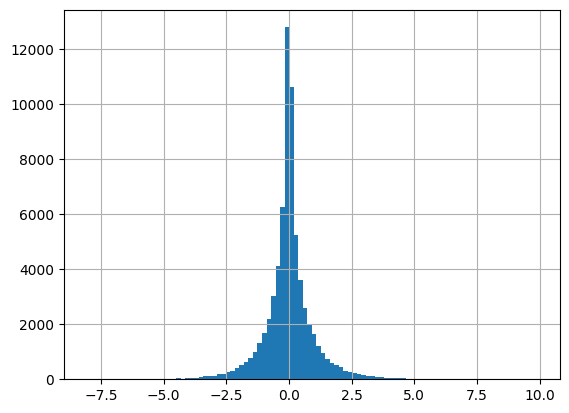

In [17]:
df.metric.hist(bins = 100)

In [18]:
characters


,movie_wiki_id,movie_freebase_id,release_date_cmu,character_name,actor_name,height,birth_cmu,birth_wd,birth_imdb,combined_birth,...,gender_wd,combined_gender,ethnicity_cmu,ethnicity_wd,combined_ethnicity,freebase_character_id,freebase_actor_id,wikidata_actor_id,actor_imdb_id,combined_release_year
0,975900,/m/03vyhn,2001,Akooshay,Wanda De Jesus,1.620,1958.0,1958.0,1958.0,1958.0,...,female,female,NaN,NaN,NaN,/m/0bgcj3x,/m/03wcfv7,Q1873468,nm0208962,2001.0
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,Natasha Henstridge,1.780,1974.0,1974.0,1974.0,1974.0,...,female,female,NaN,NaN,NaN,/m/0bgchn4,/m/0346l4,Q230527,nm0000449,2001.0
2,975900,/m/03vyhn,2001,Desolation Williams,Ice Cube,1.727,1969.0,1969.0,1969.0,1969.0,...,male,male,African Americans,NaN,African Americans,/m/0bgchn_,/m/01vw26l,Q173637,nm0001084,2001.0
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,Jason Statham,1.750,1967.0,1967.0,1967.0,1967.0,...,male,male,NaN,NaN,NaN,/m/0bgchnq,/m/034hyc,Q169963,nm0005458,2001.0
4,975900,/m/03vyhn,2001,Bashira Kincaid,Clea DuVall,1.650,1977.0,1977.0,1977.0,1977.0,...,female,female,NaN,NaN,NaN,/m/0bgchp9,/m/01y9xg,Q233347,nm0245112,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992,Elensh,Dorothy Elias-Fahn,NaN,1970.0,1962.0,1962.0,1962.0,...,female,female,NaN,NaN,NaN,/m/0kr406h,/m/0b_vcv,Q5298405,nm0253528,1992.0
450665,913762,/m/03pcrp,1992,Hibiki,Jonathan Fahn,NaN,1965.0,1965.0,1965.0,1965.0,...,male,male,NaN,NaN,NaN,/m/0kr4090,/m/0bx7_j,Q3809919,nm0153068,1992.0
450666,28308153,/m/0cp05t9,1957,NaN,David Hemmings,1.730,1941.0,NaN,NaN,1941.0,...,NaN,male,English people,NaN,English people,NaN,/m/022g44,NaN,NaN,1957.0
450667,28308153,/m/0cp05t9,1957,NaN,Roberta Paterson,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,/m/0g8ngmm,NaN,NaN,1957.0


In [29]:
completeness_height = len(characters.height.dropna())/len(characters)
completeness_age = len(characters.combined_birth.dropna())/len(characters)

print(f"we have {100*completeness_height}% of all actor's heights")
print(f"we have {100*completeness_age}% of all actor's date of birth")

we have 34.35426000013314% of all actor's heights
we have 77.73332534520901% of all actor's age


In [40]:
characters[["actor_name","height","combined_birth"]].groupby("actor_name").mean()

,height,combined_birth
actor_name,,
Cesarine Prinz\t,NaN,1883.0
Daniel Newman,NaN,1976.0
'Big Bill' Giddinger,NaN,NaN
'Big' Lee,NaN,NaN
'Chicken' Holleman,NaN,NaN
...,...,...
雅-miyavi-,1.85,1981.0
雪乃五月,NaN,1970.0
高山久子,NaN,1961.0


In [41]:
characters[["actor_name","height","combined_birth"]].groupby("actor_name").mean().dropna()



,height,combined_birth
actor_name,,
50 Cent,1.829,1975.0
A. J. Buckley,1.750,1977.0
A. J. Cook,1.690,1978.0
A. J. Langer,1.550,1974.0
A.J. Saudin,1.720,1992.0
...,...,...
Özgür Çevik,1.820,1981.0
Željko Ivanek,1.700,1957.0
田村英里子,1.620,1973.0


In [37]:
characters.[""]

,movie_wiki_id,movie_freebase_id,release_date_cmu,character_name,actor_name,height,birth_cmu,birth_wd,birth_imdb,combined_birth,...,gender_wd,combined_gender,ethnicity_cmu,ethnicity_wd,combined_ethnicity,freebase_character_id,freebase_actor_id,wikidata_actor_id,actor_imdb_id,combined_release_year
52621,19547540,/m/04mz27h,2009,NaN,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,NaN,/m/01vvyc_,Q6060,nm1265067,2009.0
65209,31508731,/m/0glpdgy,2012,NaN,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,NaN,/m/01vvyc_,Q6060,nm1265067,2012.0
71882,2617126,/m/07s114,2005,Marcus,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,/m/0h5srk4,/m/01vvyc_,Q6060,nm1265067,2005.0
91358,29842235,/m/0crr_lr,2010,NaN,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,NaN,/m/01vvyc_,Q6060,nm1265067,2010.0
126916,11288620,/m/02r6fhw,2008,Spider,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,/m/0h6dd7g,/m/01vvyc_,Q6060,nm1265067,2008.0
136483,33377958,/m/0gxw7g1,2012,NaN,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,NaN,/m/01vvyc_,Q6060,nm1265067,2012.0
149766,31738289,/m/0gty278,2011,Sonny,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,/m/0h8mzx6,/m/01vvyc_,Q6060,nm1265067,2011.0
152194,27211939,/m/0bwg8pq,2011,Detective Hardwick,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,/m/0h5vcx4,/m/01vvyc_,Q6060,nm1265067,2011.0
155535,21798180,/m/05mz_dh,2010,Jimmy,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,/m/0h5p_34,/m/01vvyc_,Q6060,nm1265067,2010.0
219566,4332994,/m/0bxmjj,2005,NaN,50 Cent,1.829,1975.0,1975.0,1975.0,1975.0,...,male,male,African Americans,African Americans,African Americans,NaN,/m/01vvyc_,Q6060,nm1265067,2005.0
